In [129]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [130]:
# Load the S&P 500 dataset
dataset = pd.read_csv('sp500.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-01,2415.649902,2430.060059,2413.540039,2430.060059,2430.060059,3860620000
1,2017-06-02,2431.280029,2440.229980,2427.709961,2439.070068,2439.070068,3465500000
2,2017-06-05,2437.830078,2439.550049,2434.320068,2436.100098,2436.100098,2916720000
3,2017-06-06,2431.919922,2436.209961,2428.120117,2429.330078,2429.330078,3376750000
4,2017-06-07,2432.030029,2435.280029,2424.750000,2433.139893,2433.139893,3576220000


In [131]:
# Select features and target variable
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
target = 'Close'

In [132]:
# Preprocess the dataset
scaler = MinMaxScaler()
scaled_dataset = scaler.fit_transform(dataset[features + [target]].values)

In [133]:
# Split the dataset into training and testing sets
train_size = int(len(dataset) * 0.8)  # 80% training, 20% testing
train_data = scaled_dataset[:train_size]
test_data = scaled_dataset[train_size:]

In [134]:
# Split the features and target variable
train_features = train_data[:, :-1]
train_target = train_data[:, -1]
test_features = test_data[:, :-1]
test_target = test_data[:, -1]

In [135]:
# Reshape the features for LSTM input shape (samples, timesteps, features)
train_features = np.reshape(train_features, (train_features.shape[0], 1, train_features.shape[1]))
test_features = np.reshape(test_features, (test_features.shape[0], 1, test_features.shape[1]))

In [136]:
# Define the number of Monte Carlo samples
n_samples = 100  # Adjust this value based on your needs

In [137]:
# Build the Bayesian LSTM model with Monte Carlo dropout
model_bayesian = Sequential([
    LSTM(units=50, activation='relu', input_shape=(1, len(features)), return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, activation='relu'),
    Dropout(0.2),
    Dense(units=1)
])

In [138]:
# Compile the model
model_bayesian.compile(optimizer='adam', loss='mean_squared_error')

In [139]:
# Fit the Bayesian LSTM model
model_bayesian.fit(train_features, train_target, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 4s 6ms/step - loss: 0.1029
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0414
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0116
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 11/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 12/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 13/100
32/32 [=================

In [140]:
# Function to perform Monte Carlo sampling
def monte_carlo_dropout_predictions(model, x, n_samples):
    result = np.zeros((n_samples, x.shape[0], 1))
    for i in range(n_samples):
        result[i] = model.predict(x)
    return result

In [141]:
# Make predictions with the Bayesian LSTM model
predictions_bayesian = monte_carlo_dropout_predictions(model_bayesian, test_features, n_samples)
mean_predictions_bayesian = np.mean(predictions_bayesian, axis=0)
uncertainty_predictions_bayesian = np.std(predictions_bayesian, axis=0)

8/8 [==============================] - 0s 3ms/step


In [142]:
# Build the conventional LSTM model
model_conventional = Sequential([
    LSTM(units=50, activation='relu', input_shape=(1, len(features))),
    Dense(units=1)
])

In [143]:
# Compile the model
model_conventional.compile(optimizer='adam', loss='mean_squared_error')

In [144]:
# Fit the conventional LSTM model
model_conventional.fit(train_features, train_target, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 0.0925
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0331
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0274e-04
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 2.8239e-04
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 1.9396e-04
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 1.5229e-04
Epoch 11/100
32/32 [==============================] - 0s 5ms/step - loss: 1.3326e-04
Epoch 12/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1884e-04
Epoch 13/100


In [145]:
# Make predictions with the conventional LSTM model
predictions_conventional = model_conventional.predict(test_features)

8/8 [==============================] - 0s 2ms/step


In [146]:
# Invert scaling on predictions
mean_predictions_bayesian = scaler.inverse_transform(np.concatenate((test_features.reshape(-1, len(features)), mean_predictions_bayesian), axis=1))[:, -1]
uncertainty_predictions_bayesian = scaler.inverse_transform(np.concatenate((test_features.reshape(-1, len(features)), uncertainty_predictions_bayesian), axis=1))[:, -1]
predictions_conventional = scaler.inverse_transform(np.concatenate((test_features.reshape(-1, len(features)), predictions_conventional), axis=1))[:, -1]
test_target = scaler.inverse_transform(np.concatenate((test_features.reshape(-1, len(features)), test_target.reshape(-1, 1)), axis=1))[:, -1]

In [147]:
# Calculate evaluation metrics
mape_bayesian = mean_absolute_percentage_error(test_target, mean_predictions_bayesian)
mae_bayesian = mean_absolute_error(test_target, mean_predictions_bayesian)
rmse_bayesian = np.sqrt(mean_squared_error(test_target, mean_predictions_bayesian))
r2_bayesian = r2_score(test_target, mean_predictions_bayesian)

mape_conventional = mean_absolute_percentage_error(test_target, predictions_conventional)
mae_conventional = mean_absolute_error(test_target, predictions_conventional)
rmse_conventional = np.sqrt(mean_squared_error(test_target, predictions_conventional))
r2_conventional = r2_score(test_target, predictions_conventional)

In [148]:
# Print the evaluation metrics
print("Bayesian LSTM Model:")
print("MAPE: ", mape_bayesian)
print("MAE: ", mae_bayesian)
print("RMSE: ", rmse_bayesian)
print("R-squared: ", r2_bayesian)

print("Conventional LSTM Model:")
print("MAPE: ", mape_conventional)
print("MAE: ", mae_conventional)
print("RMSE: ", rmse_conventional)
print("R-squared: ", r2_conventional)

Bayesian LSTM Model:
MAPE:  0.01084852927375948
MAE:  48.067441938352204
RMSE:  52.90303664850801
R-squared:  0.9503637612075905
Conventional LSTM Model:
MAPE:  0.008162478360240432
MAE:  36.34965011441818
RMSE:  44.534161246231484
R-squared:  0.9648258009449245


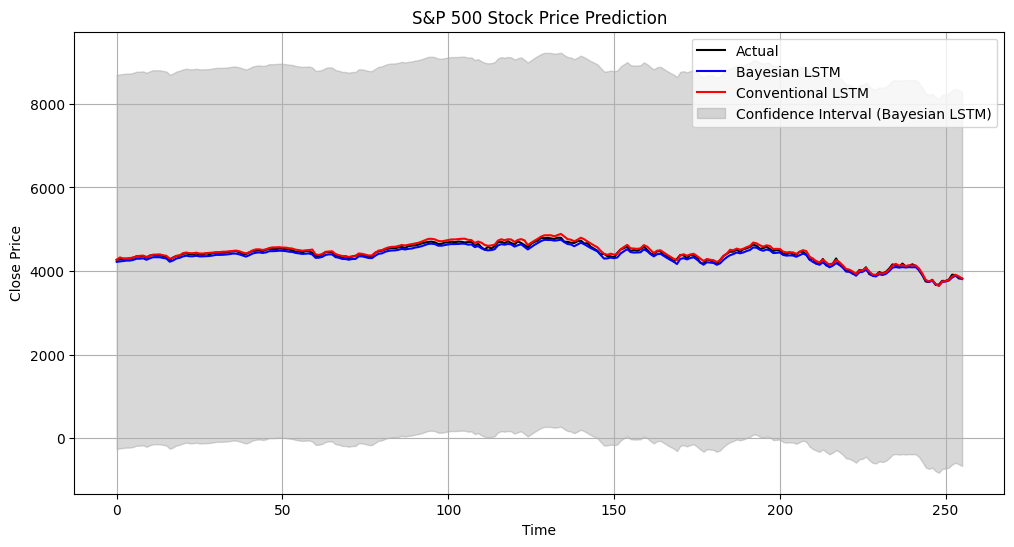

In [149]:
import matplotlib.pyplot as plt
# Plot the predictions and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(test_target, color='black', label='Actual')
plt.plot(mean_predictions_bayesian, color='blue', label='Bayesian LSTM')
plt.plot(predictions_conventional, color='red', label='Conventional LSTM')
plt.fill_between(
    range(len(test_target)),
    mean_predictions_bayesian - 2 * uncertainty_predictions_bayesian,
    mean_predictions_bayesian + 2 * uncertainty_predictions_bayesian,
    color='gray',
    alpha=0.3,
    label='Confidence Interval (Bayesian LSTM)'
)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('S&P 500 Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

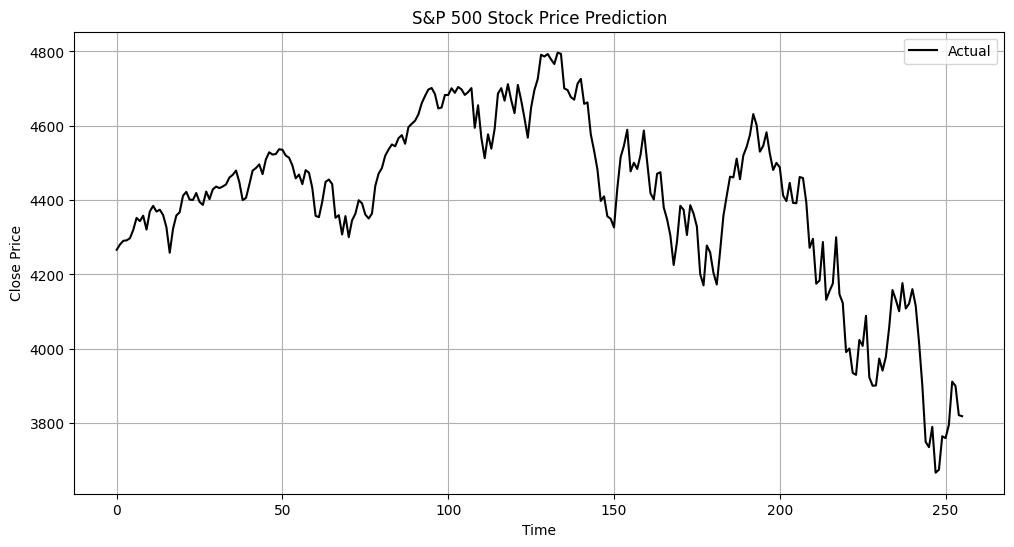

In [150]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_target, color='black', label='Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('S&P 500 Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

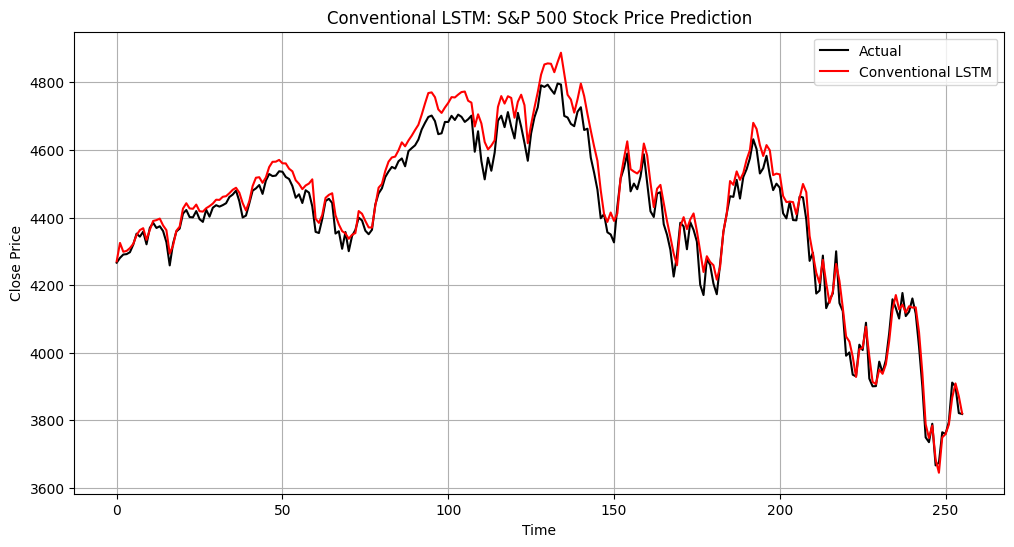

In [151]:
# Plot the predictions for the conventional LSTM model
plt.figure(figsize=(12, 6))
plt.plot(test_target, color='black', label='Actual')
plt.plot(predictions_conventional, color='red', label='Conventional LSTM')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Conventional LSTM: S&P 500 Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

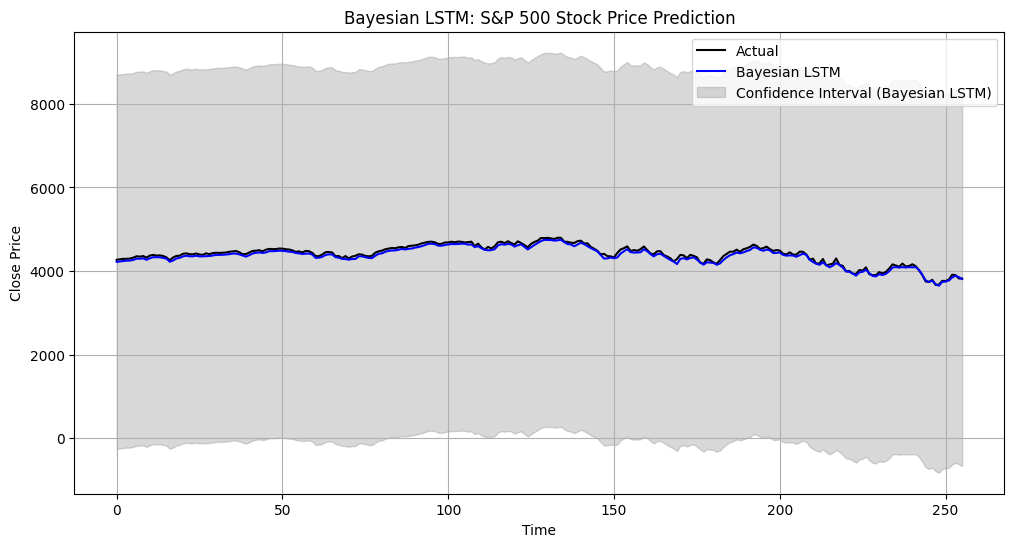

In [152]:
# Plot the predictions and confidence interval for the Bayesian LSTM model
plt.figure(figsize=(12, 6))
plt.plot(test_target, color='black', label='Actual')
plt.plot(mean_predictions_bayesian, color='blue', label='Bayesian LSTM')
plt.fill_between(
    range(len(test_target)),
    mean_predictions_bayesian - 2 * uncertainty_predictions_bayesian,
    mean_predictions_bayesian + 2 * uncertainty_predictions_bayesian,
    color='gray',
    alpha=0.3,
    label='Confidence Interval (Bayesian LSTM)'
)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Bayesian LSTM: S&P 500 Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
# Calculate residuals for the Bayesian LSTM model
residuals_bayesian = test_target - mean_predictions_bayesian

# Calculate residuals for the conventional LSTM model
residuals_conventional = test_target - predictions_conventional

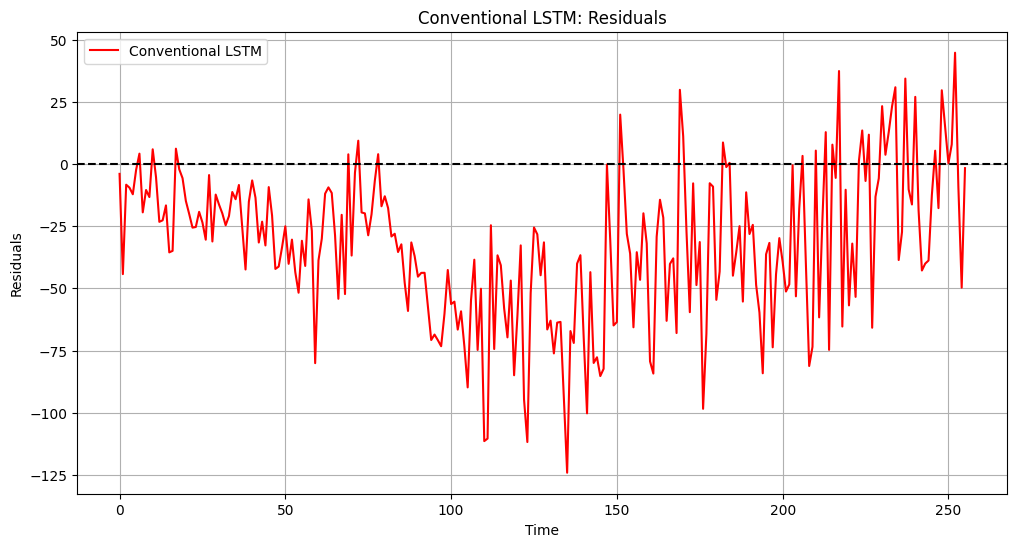

In [154]:
# Plot residuals for the Conventional LSTM model
plt.figure(figsize=(12, 6))
plt.plot(residuals_conventional, color='red', label='Conventional LSTM')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Conventional LSTM: Residuals')
plt.legend()
plt.grid(True)
plt.show()

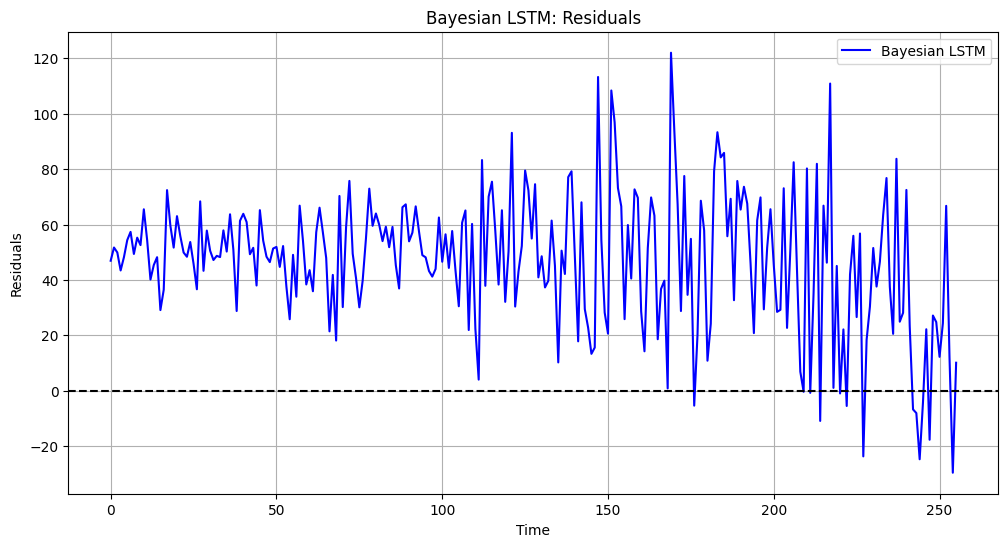

In [155]:
# Plot residuals for the Bayesian LSTM model
plt.figure(figsize=(12, 6))
plt.plot(residuals_bayesian, color='blue', label='Bayesian LSTM')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Bayesian LSTM: Residuals')
plt.legend()
plt.grid(True)
plt.show()

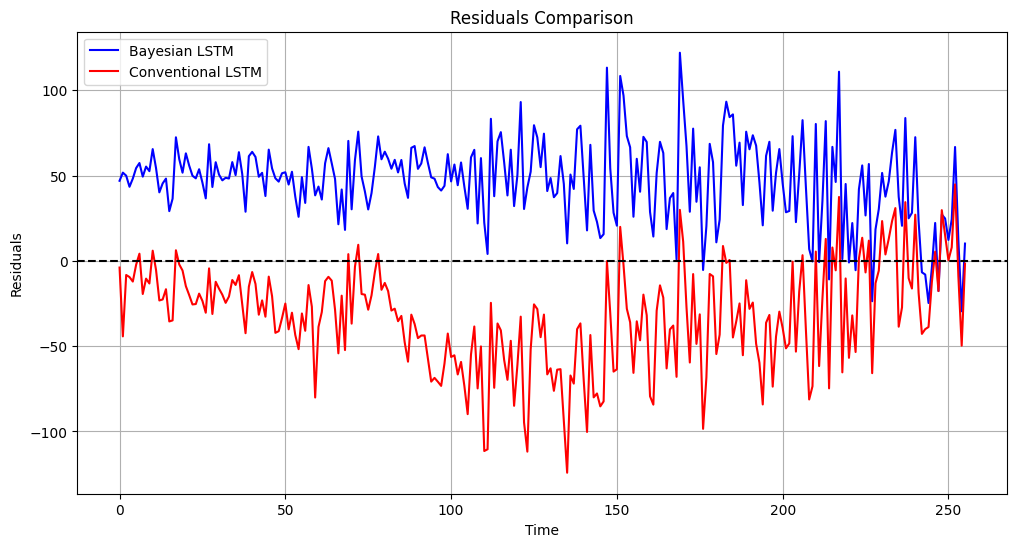

In [156]:
# Plot residuals for both models
plt.figure(figsize=(12, 6))
plt.plot(residuals_bayesian, color='blue', label='Bayesian LSTM')
plt.plot(residuals_conventional, color='red', label='Conventional LSTM')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals Comparison')
plt.legend()
plt.grid(True)
plt.show()